# Введение


Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

## Загрузка данных

Для начала ознакомимся с данными, которые у нас есть. Согласно легенде исследования, заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

Что ж, приступим к исследованию. Для начала импортируем все необходимые библиотеки и немного поменяем стиль оформления. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
plt.style.use('seaborn-dark')

И, собственно, загрузим наш датафрейм.

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

### Выводы

Мы ознакомились с легендой исследования, задачами, которые нам предстоит решить, а также провели импорт необходимых библиотек и загрузили таблицу, с которой нам предстоит работать.

## Исследовательский анализ данных

Выведем шапку таблицы и общую информацию по ней, чтобы понять, что нас ожидает впереди:

In [3]:
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
print(df.shape)
df.info()

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

4000 строк, 14 столбцов, только числовые значения, на первый взгляд пропусков нет. В целом, неплохо.

Переведем названия столбцов в нижний регистр для удобства:

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Отлично. Так как у нас нет строковых данных, посмотрим на таблицу методом `describe()`:

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Мы можем сказать, что нас есть числовые признаки `age`, `avg_additional_charges_total`, `avg_class_frequency_total`, `month_to_end_contract`, `lifetime`,  `avg_class_frequency_current_month`. Все остальные относятся к категориальным.

Судя по данным, спортзал предлагает абонементы на 1, 6 и 12 месяцев. Возраст посетителей от 18 до 41 года, средний возраст 29 лет. Средний посетитель ходит в зал почти 4 месяца, и при этом также тратит 146 рублей в неделю на дополнительные услуги, вероятно, какие-нибудь кислородные коктейли или вода.  

Для очистки совести проверим датафрейм на дубликаты:

In [7]:
print(f'Количество дубликатов: {df.duplicated().sum()}.')

Количество дубликатов: 0.


И на пропуски:

In [8]:
print(f'Количество пропусков: {df.isna().sum()}.')

Количество пропусков: gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64.


Таковых не обнаружено, двигаемся дальше. 

Посмотрим на средние значения среди ушедших клиентов и оставшихся спортсменов:

In [9]:
churns = df.groupby('churn').agg('mean')  #временный датафрейм

Группировка работает, но разобраться в этом очень сложно.

In [10]:
churns.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Перегруппируем таблицу. Теперь намного удобнее.

In [11]:
churns.T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Итак, что мы можем сказать, глядя на средние значения для групп ушедших и оставшихся клиентов:
* чаще ушедшие клиенты живут в другом районе
* их время с первого посещения зала почти в пять раз меньше
* они намного реже ходят на групповые занятия
* они немного моложе, чем постоянные клиенты
* они тратят меньше денег на допуслуги
* и в зал они ходят значительно реже (причем, в месяц, когда они собираются бросать, средняя частота посещений снижается еще на 30%)

Сделаем списки столбцов по признакам для построения диаграмм:

In [12]:
columns = df.columns.tolist()
counts = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 
          'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']  # числовые
categories = ['gender', 'near_location', 'partner', 'promo_friends', 
                'phone', 'contract_period', 'group_visits']  # категории

In [13]:
import warnings  # чтобы не выдавало предупреждения и не портило вид
warnings.simplefilter(action='ignore', category=FutureWarning)

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался:

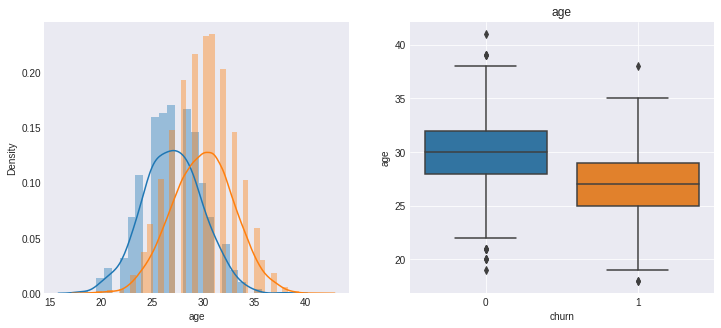

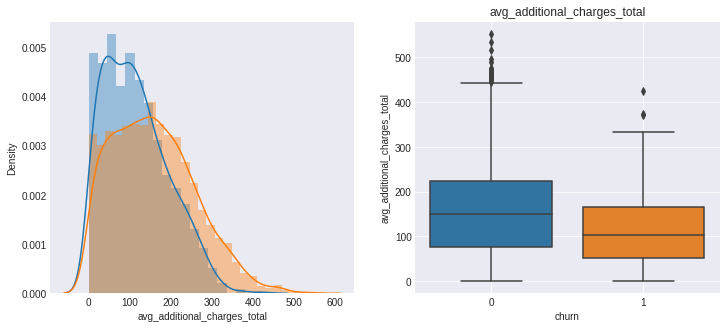

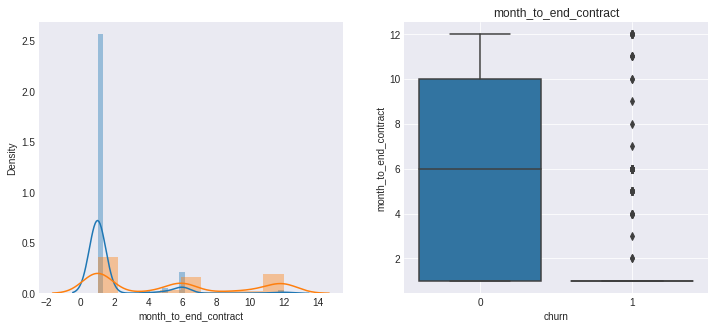

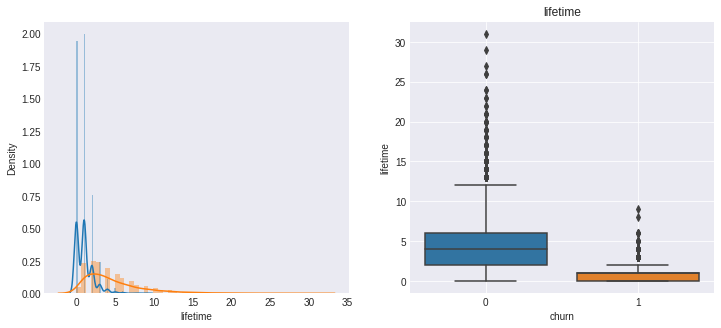

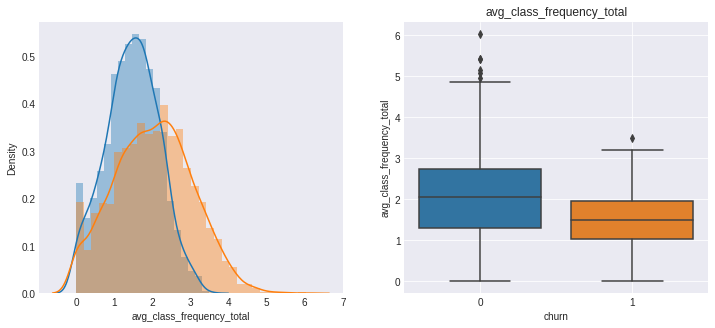

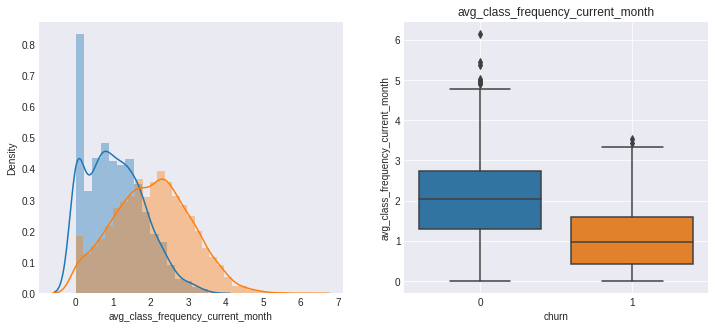

In [14]:
for col in counts:
    df.groupby('churn')[col]
    fig, ax =plt.subplots(1,2, figsize = (12, 5))
    sns.distplot(df[df['churn']==1][col], ax=ax[0])
    sns.distplot(df[df['churn']==0][col], ax=ax[0])
    sns.boxplot(x = 'churn', y = df[col], data = df, ax=ax[1])
    plt.grid()
    plt.title(col)
    fig.show()

Наши предварительные выводы по средним значениям подтверждаются графиками. Можно добавить, что у постоянных клиентов в среднем остается полгода до окончания абонемента, и время с момента первого посещения у них около года.

Теперь посмотрим на категориальные признаки:

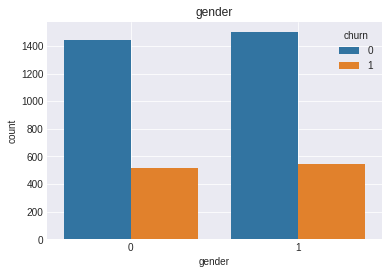

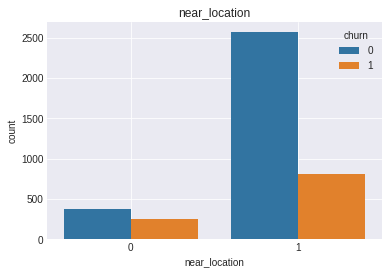

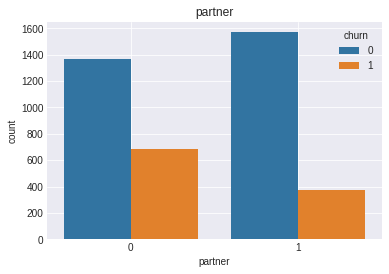

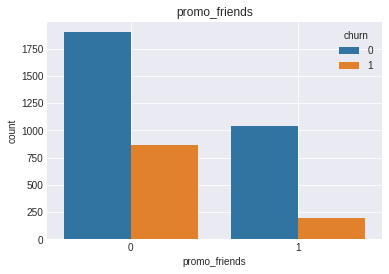

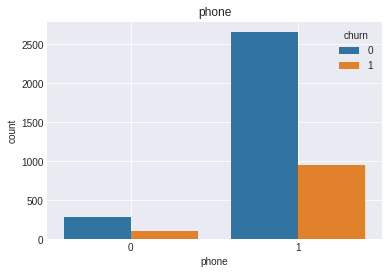

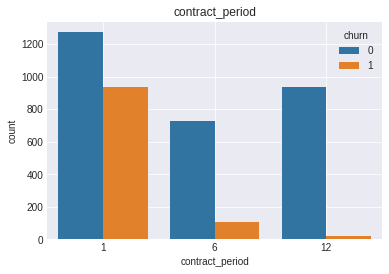

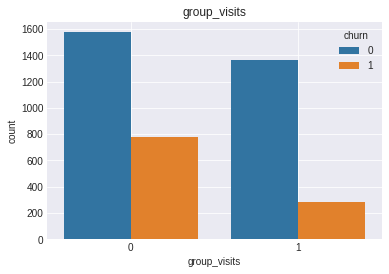

In [15]:
for col in categories:
    #df.groupby('churn')[col]
    #fig, ax =plt.subplots(1,2, figsize = (12, 4))
    sns.countplot(x = df[col], hue='churn', data=df)
    #sns.boxplot(x = 'churn', y = df[col], data = df, ax=ax[1])
    plt.grid()
    plt.title(col)
    plt.show()

Лояльные клиенты живут поблизости, не боятся оставить контактный телефон, и чаще берут годовые абонементы, чем полугодовые, смотрят в будущее, так сказать. 

In [16]:
# оставил на тот случай, если надо будет переделать на русскоязычный вариант для удобства работы.


#df_rus = df
#df_rus.columns =[
#    'пол', 'проживание рядом', 'сотрудник партнера', 'приведен другом', 'телефон', 'срок абонемента',
#    'групповые занятия', 'возраст', 'выручка от других услуг', 'срок до окончания абонемента', 'время с первого обращения',
#    'посещений в неделю', 'посещений в неделю за прошлы месяц', 'отток'
#]


Создадим и визулизируем матрицу корреляций средствами `seaborn`:

In [17]:
cm = df.corr()

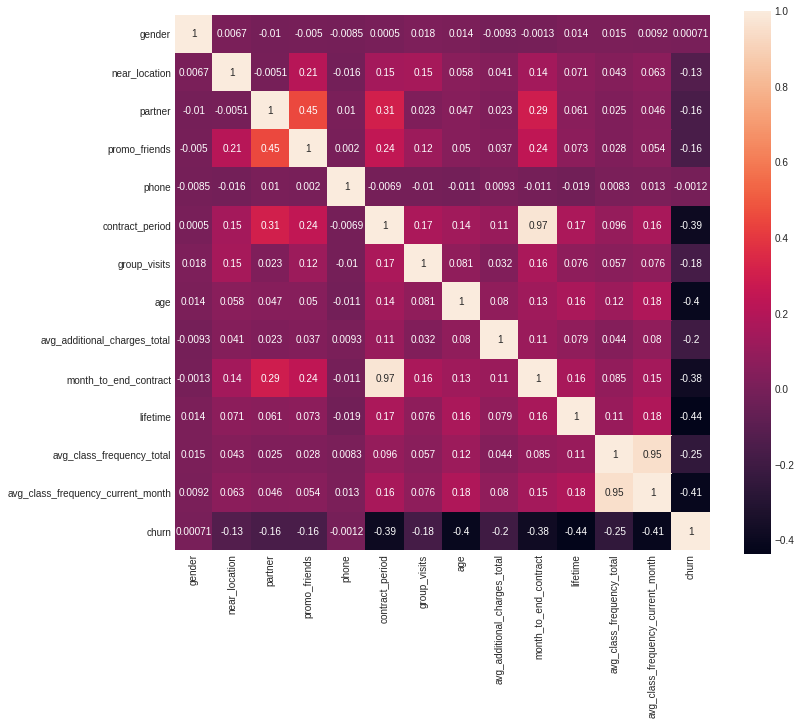

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, square=True)
plt.show()

По матрице мы видим, что есть сильная взаимосвязь между сроком до окончания абонемента и временем с момента первого визита, и между частотой посещения групповых занятий. Это сильно похоже на мультиколлинеарные признаки, и во избежание ошибок при обучении мы удалим столбцы `month_to_end_contract` и `avg_class_frequency_total`.

In [19]:
df.drop('month_to_end_contract', axis = 1, inplace = True)

In [20]:
df.drop('avg_class_frequency_total', axis = 1, inplace = True)

Никак не влияют на отток пользователей параметры пола и наличия контактного телефона. 

Более сильна связь с продолжительностью абонемента, возрастом, временем посещения зала и частотой визитов.

### Выводы

После проведения исследовательского анализа мы можем сделать следующие выводы:
* чаще ушедшие пользователи живут в другом районе
* их время с первого посещения зала почти в пять раз меньше
* они намного реже ходят на групповые занятия
* они немного моложе, чем постоянные клиенты
* они тратят меньше денег на допуслуги
* и в зал они ходят значительно реже (причем, в месяц, когда они собираются бросать, средняя частота посещений снижается еще на 30%)
* постоянные клиенты посещают зал около года
* остаток абонемента у них около 6 месяцев
* они чаще живут поблизости
* они чаще покупают годовые абонементы

Также мы избавились от двух мультиколлинеарных признаков, чтобы повысить эффективность обучения.

## Модель прогнозирования оттока клиентов

Приступим к построению моделей.

Для начала напишем функцию для вывода признаков:

In [21]:
def print_all_metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    #print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

Обучаем модель логистической регрессией:

In [22]:

# разделите наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# разделите модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# задайте алгоритм для нашей модели
model = LogisticRegression(solver='liblinear')

# обучите модель
model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
#probabilities =  model.predict_proba(X_test)[:,1]

Обучаем модель случайным лесом:

In [23]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
#rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

И выводим результаты:

In [24]:
print_all_metrics(y_test, predictions, 'Метрики логистической регрессии:')
print_all_metrics(y_test, rf_predictions,'Метрики случайного леса:')

Метрики логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.79
	F1: 0.79
Метрики случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75
	F1: 0.78


### Выводы

Обе модели показали равную долю верных ответов (0,9). Случайный лес показывает более высокую точность (0,81 против 0,79), но логистическая регрессия более сбалансирована - 0,79 против 0,78. На основании этих данных делаем вывод, что для прогнозирвоания оттока нам больше подойдет модель логистической регрессии.

## Кластеризация

Проведем стандартизацию и кластеризацию данных, составив матрицу расстояний:

In [25]:
X = df.drop('churn', axis = 1)  # избавляемся от целевой переменной
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

И отобразим дендрограмму:

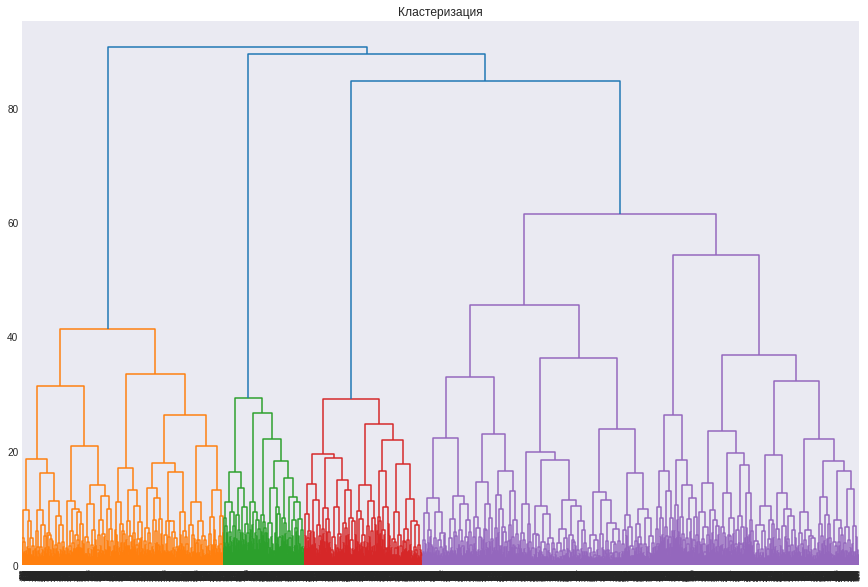

In [26]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация')
plt.show() 

Получилось четыре кластера. Добавим еще один, согласно заданию:

In [27]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

Сохраняем метки кластера в таблице:

In [28]:
df['clusters'] = labels

Посмотрим, как распределились кластеры:

In [29]:
display(df.groupby(['clusters']).agg(count = ('gender','count')))

,count
clusters,
0,985
1,558
2,1064
3,1007
4,386


Кластеры `0`, `2`, `3` значительно крупнее остальных.

Посмотрим на средние значения по кластерам:

In [30]:
display(df.groupby(['clusters']).mean().T)  # не стал два раза писать одно и то же, сразу развернул

clusters,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


И мы сразу видим, что наиболее высок риск оттока в кластерах 2 - целых 56% и 1 - 40%.
* в этих кластерах самый короткий средний период действия абонемента от 2 до 3 месяцев
* самый молодой контингент - 27-28 лет
* они меньше всех тратят деньги на сопутствующие услуги
* они относительно недавно начали ходить в зал - 2-3 месяца назад

Кластеры самых лояльных пользователей 0 - 11% оттока и 3 - 1% отока, они составляют почти половину от всех пользователей.
* клиенты живут недалеко
* в среднем приобретают полугодовые абонементы
* половина клиентов посещает групповые занятия
* более возрастной контингент: 29-30 лет
* ходят в зал уже давно, 4-5 лет
* больше всех тратят деньги на сопутствующие услуги

Построим диаграммы распределения по кластерам.

Обновим список числовых и категориальных признаков:

In [31]:
counts_new = ['age', 'avg_additional_charges_total',
          'lifetime', 'avg_class_frequency_current_month']  # числовые
categories_new = ['gender', 'near_location', 'partner', 'promo_friends', 
                'phone', 'contract_period', 'group_visits']  # категории

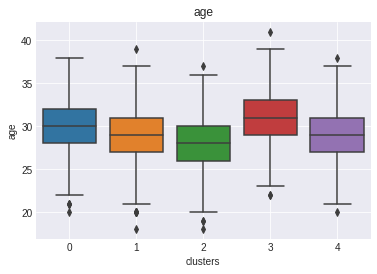

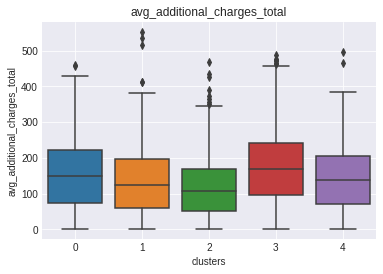

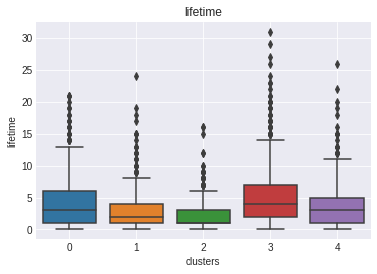

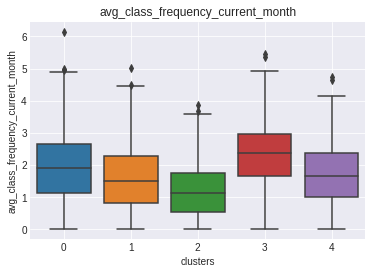

In [32]:
for col in counts_new:
    sns.boxplot(x = 'clusters', y = df[col], data = df)
    plt.grid()
    plt.title(col)
    plt.show()

Наши выводы подтверждаются графиками. Интересно, что есть люди, которые ходят в этот зал больше двух лет - самый лояльный 3 кластер. Они же чаще всех занимаются, больше всех тратят на сопутствующие услуги.

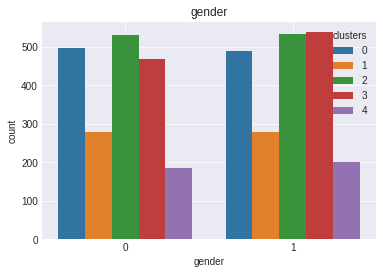

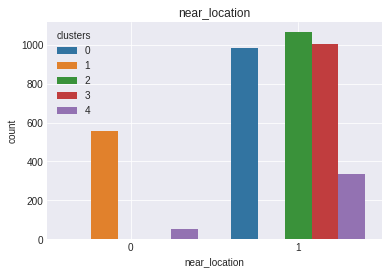

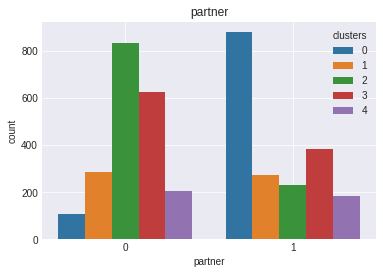

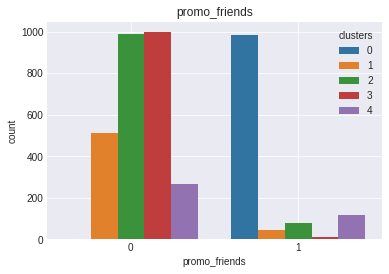

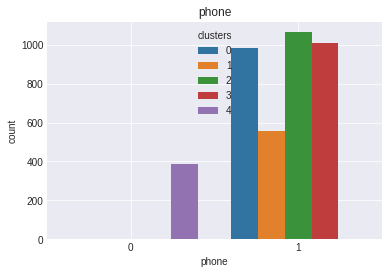

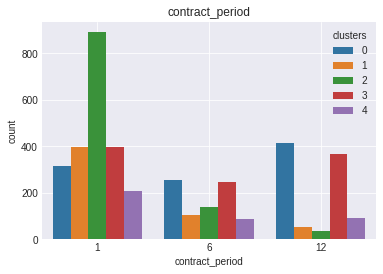

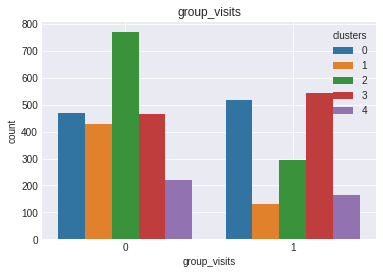

In [33]:
for col in categories:
    sns.countplot(x = df[col], hue='clusters', data=df)
    plt.grid()
    plt.title(col)
    plt.show()

Не живут в районе расположения зала только клиенты кластера 1 и частично 4. Также клиенты 4 кластера крайне неохотно оставляют номер телефона. Также клиенты с высокой вероятностью оттока часто являются сотрудниками компании-партнера.

In [34]:
#cluster = df.query('clusters == 1')

In [35]:
#cluster.groupby('churn')['age'].agg('count').T

И еще раз взглянем на вероятность оттока клиентов по кластерам.

Кластеры рассположены в порядке возрастания вероятности оттока:

In [36]:
df.groupby('clusters')['churn'].agg('mean').sort_values()

clusters
3    0.014896
0    0.119797
4    0.266839
1    0.403226
2    0.563910
Name: churn, dtype: float64

### Выводы

По итогам проведенной кластеризации мы имеем 5 кластеров с вероятностью оттока от 1% до 56%.

Наиболее высок риск оттока в кластерах 2 - целых 56% и 1 - 40%.
* в этих кластерах самый короткий средний период действия абонемента от 2 до 3 месяцев
* самый молодой контингент - 27-28 лет
* они меньше всех тратят деньги на сопутствующие услуги
* они относительно недавно начали ходить в зал - 2-3 месяца назад

Кластеры самых лояльных пользователей 0 - 11% оттока и 3 - 1% отока, они составляют почти половину от всех пользователей.
* клиенты живут недалеко
* в среднем приобретают полугодовые абонементы
* половина клиентов посещает групповые занятия
* более возрастной контингент: 29-30 лет
* ходят в зал уже давно, 4-5 лет
* больше всех тратят деньги на сопутствующие услуги

## Результаты исследования:

После проведения исследовательского анализа в целом, мы можем сделать следующие выводы:

* чаще ушедшие пользователи живут в другом районе
* их время с первого посещения зала почти в пять раз меньше
* они намного реже ходят на групповые занятия
* они немного моложе, чем постоянные клиенты
* они тратят меньше денег на допуслуги значительно реже посещают зал 
* в месяц, когда клиент собирается бросить зал, средняя частота посещений снижается еще на 30%

В то время как:

* постоянные клиенты посещают зал более года
* остаток абонемента у них около 6 месяцев
* они чаще живут поблизости
* они чаще покупают годовые абонементы

Никак не влияют на отток пользователей параметры пола и наличия контактного телефона.

Ярко выражена связь с продолжительностью абонемента, возрастом, временем посещения зала и частотой визитов.


Обе модели прогнозирования оттока показали равную долю верных ответов (0,9). Случайный лес показывает более высокую точность (0,81 против 0,79), но логистическая регрессия более сбалансирована - 0,79 против 0,78. На основании этих данных деалем вывод, что нам больше подойдет модель логистической регрессии.

Проведенная кластеризация дала нам 5 кластеров с вероятностью оттока от 1% до 56%.

Наиболее высок риск оттока в кластерах 2 - целых 56% и 1 - 40%.

* в этих кластерах самый короткий средний период действия абонемента от 2 до 3 месяцев
* самый молодой контингент - 27-28 лет
* они меньше всех тратят деньги на сопутствующие услуги
* они относительно недавно начали ходить в зал - 2-3 месяца назад
* реже ходят на групповые тренировки

Кластеры самых лояльных пользователей 0 - 11% оттока и 3 - 1% отока, они составляют почти половину от всех пользователей.

* клиенты живут недалеко
* в среднем приобретают полугодовые абонементы
* половина клиентов посещает групповые занятия
* более возрастной контингент: 29-30 лет
* ходят в зал уже давно, более полутора лет
* больше всех тратят деньги на сопутствующие услуги
* есть люди, которые ходят в этот зал больше двух лет - самый лояльный 3 кластер
* они же чаще всех занимаются, больше всех тратят на сопутствующие услуги

### Рекомендации

Судя по всему, наблюдаются проблемы с людьми, только начинающими свой путь в фитнесе. Это люди младше 29 лет, которые берут кратковременный абонемент на пробу, но что-то их отталкивает на начальном этапе, и они его не продлевают. Они редко ходят на групповые тренировки, не тратят дополнительные средства в зале.Также они часто ездят из другого района.

Так как многие клиенты ходят в зал достаточно давно, можно предположить, что проблемы начались недавно.

Что можно предложить для исправления ситуации:
* необходимо проанализировать изменения в политике клуба за последний год - проблемы с тренерами, затянувшийся ремонт, резкий рост цен
* надо попробовать простимулировать клиентов на продление абонементов - скидки при покупке годовых программ, подарки
* почему клиенты не хотят продлевать абонементы? им не нравится интерьер, тренеры, цены? туда же, к первому пункту, анализ изменений
* возможно, не все пробовали групповые занятия? Провести рассылку с коротким и завлекающим описанием программ
* вероятно, люди не тратят деньги в зале, потому что им некомфортно, или дорого. Предложить скидку на бар или бесплатный пробный период, комплименты от зала.
* людям неудобно добираться до зала? частичная компенсация проезда при продлении абонемента на год, анализ схемы проезда, может быть, открылась новая станция общественного транспорта поблизости?